* Companies often receive thousands of resumes for each job posting and employ dedicated screening officers to screen qualified candidates.

Hiring the right talent is a challenge for all businesses. This challenge is magnified by the high volume of applicants if the business is labour-intensive, growing, and facing high attrition rates.

IT departments are short of growing markets. In a typical service organization, professionals with a variety of technical skills and business domain expertise are hired and assigned to projects to resolve customer issues. This task of selecting the best talent among many others is known as Resume Screening.

Typically, large companies do not have enough time to open each CV, so they use machine learning algorithms for the Resume Screening task.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import nltk

In [2]:
cv=pd.read_csv('/content/UpdatedResumeDataSet.csv',encoding='utf-8')
cv

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [3]:
cv.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
cv.tail()

,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [5]:
cv.dtypes

Category    object
Resume      object
dtype: object

In [6]:
cv.columns

Index(['Category', 'Resume'], dtype='object')

In [7]:
cv.isna().sum()

Category    0
Resume      0
dtype: int64

In [8]:
cv.duplicated().sum()

796

In [9]:
cv.shape

(962, 2)

In [10]:
# cv.drop_duplicates()

In [11]:
cat=cv['Category'].value_counts()
cat

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

<Axes: xlabel='count', ylabel='Category'>

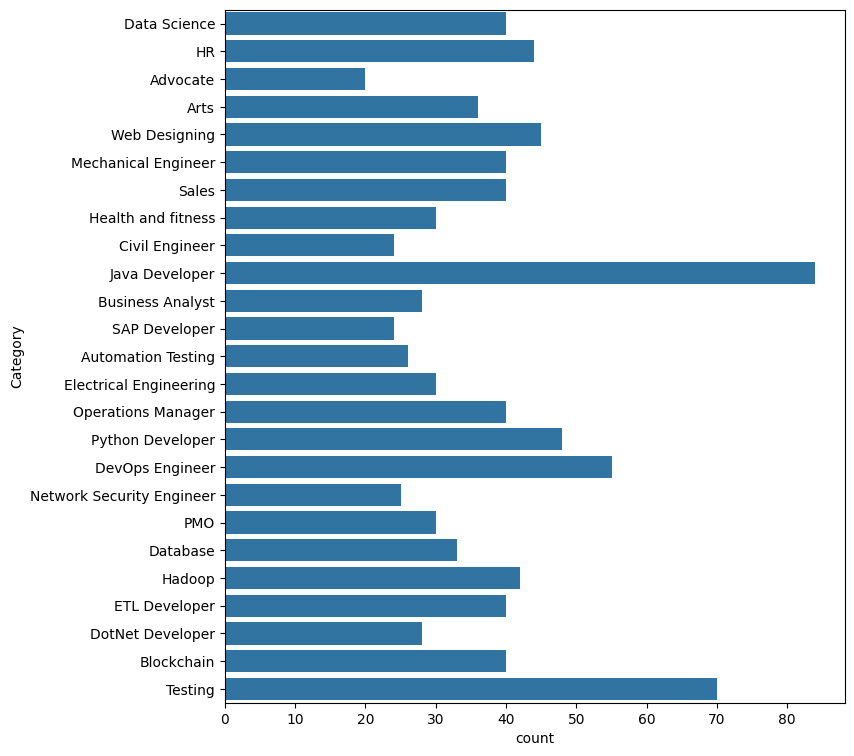

In [12]:
plt.figure(figsize=(8,9))
sns.countplot(y=cv['Category'])

In [13]:
# px.pie(cv,values=cat,names=cat.index,title='JOB-COUNT',hole=0.4)

In [14]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('owm-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Error loading owm-1.4: Package 'owm-1.4' not found in
[nltk_data]     index
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [15]:
cv['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
cv['Category_lab']=la.fit_transform(cv['Category'])
cv

,Category,Resume,Category_lab
0,Data Science,Skills * Programming Languages: Python (pandas...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",6
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,23
958,Testing,â Willingness to accept the challenges. â ...,23
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",23
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,23


In [17]:
label=pd.DataFrame({'Cata':cv['Category'],'Cata_lab':cv['Category_lab']})
label.drop_duplicates()

,Cata,Cata_lab
0,Data Science,6
40,HR,12
84,Advocate,0
104,Arts,1
140,Web Designing,24
185,Mechanical Engineer,16
225,Sales,22
265,Health and fitness,14
295,Civil Engineer,5
319,Java Developer,15


In [18]:
sk=cv['Resume']
sk

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

In [19]:
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
sk=sk.apply(lambda x:' '.join([i for i in tk.tokenize(x)]))
sk

0      Skills * Programming Languages : Python ( pand...
1      Education Details May 2013 to May 2017 B . E U...
2      Areas of Interest Deep Learning , Control Syst...
3      Skills â  ¢ R â  ¢ Python â  ¢ SAP HANA â ...
4      Education Details MCA YMCAUST , Faridabad , Ha...
                             ...                        
957    Computer Skills : â  ¢ Proficient in MS offic...
958    â   Willingness to accept the challenges . â...
959    PERSONAL SKILLS â  ¢ Quick learner , â  ¢ Ea...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP / 7/8 /8 . 1/10 Databa...
Name: Resume, Length: 962, dtype: object

In [20]:
sk=sk.str.replace('[^a-zA-Z0-9]+',' ')

<ipython-input-20-97f580f9ef7b>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  sk=sk.str.replace('[^a-zA-Z0-9]+',' ')


In [21]:
sk

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to accept the challenges Positive...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

In [22]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
sk=sk.apply(lambda x:' '.join([i for i in tk.tokenize(x.lower()) if i not in stop]))
sk

0      skills programming languages python pandas num...
1      education details may 2013 may 2017 b e uit rg...
2      areas interest deep learning control system de...
3      skills r python sap hana tableau sap hana sql ...
4      education details mca ymcaust faridabad haryan...
                             ...                        
957    computer skills proficient ms office word basi...
958    willingness accept challenges positive thinkin...
959    personal skills quick learner eagerness learn ...
960    computer skills software knowledge ms power po...
961    skill set os windows xp 7 8 8 1 10 database my...
Name: Resume, Length: 962, dtype: object

In [23]:
from nltk.stem import SnowballStemmer
ss=SnowballStemmer('english')
sk=sk.apply(lambda x:' '.join([ss.stem(i) for i in tk.tokenize(x)]))
sk

0      skill program languag python panda numpi scipi...
1      educ detail may 2013 may 2017 b e uit rgpv dat...
2      area interest deep learn control system design...
3      skill r python sap hana tableau sap hana sql s...
4      educ detail mca ymcaust faridabad haryana data...
                             ...                        
957    comput skill profici ms offic word basic excel...
958    willing accept challeng posit think good learn...
959    person skill quick learner eager learn new thi...
960    comput skill softwar knowledg ms power point m...
961    skill set os window xp 7 8 8 1 10 databas mysq...
Name: Resume, Length: 962, dtype: object

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
x=vec.fit_transform(sk)
x

<962x5478 sparse matrix of type '<class 'numpy.float64'>'
	with 151712 stored elements in Compressed Sparse Row format>

In [25]:
print(x)

  (0, 3326)	0.030407883464630286
  (0, 788)	0.027390324283368395
  (0, 328)	0.023725207582954315
  (0, 2445)	0.04523598042354346
  (0, 463)	0.0465928569503858
  (0, 283)	0.023129512410661194
  (0, 2530)	0.0465928569503858
  (0, 4776)	0.02258599656645727
  (0, 1761)	0.02695242053401081
  (0, 5198)	0.01550329850812341
  (0, 4719)	0.03169740915482615
  (0, 2959)	0.0110381029354677
  (0, 2425)	0.040724986450007196
  (0, 1893)	0.0465928569503858
  (0, 914)	0.03919981398542605
  (0, 572)	0.03793643661942844
  (0, 1330)	0.03841674627643545
  (0, 4812)	0.023003370125455197
  (0, 2033)	0.03793643661942844
  (0, 1781)	0.017568580943255124
  (0, 3247)	0.020048614832993025
  (0, 310)	0.02848137910092515
  (0, 3354)	0.029760325945478096
  (0, 4338)	0.018229846730524545
  (0, 4512)	0.030933434699603624
  :	:
  (961, 447)	0.03269858568478258
  (961, 1707)	0.035866294669224454
  (961, 4943)	0.059150885153093295
  (961, 595)	0.03614804841106143
  (961, 1469)	0.01951446497576632
  (961, 1224)	0.03665524

In [26]:
x.shape

(962, 5478)

In [27]:
y=cv['Category'].values
y.shape

(962,)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=42)
x_train.shape,x_test.shape

((673, 5478), (289, 5478))

In [29]:
y_train.shape,y_test.shape

((673,), (289,))

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
des=DecisionTreeClassifier(criterion='entropy')
knn=KNeighborsClassifier(n_neighbors=7)
bb=MultinomialNB()
sv=SVC()
ran=RandomForestClassifier(n_estimators=4,criterion='entropy')
lst=[knn,bb,sv,des,ran]

from sklearn.metrics import accuracy_score,classification_report
for i in lst:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(i)
  print('accuracy : ',accuracy_score(y_test,y_pred))
  print('report :',classification_report(y_test,y_pred))


KNeighborsClassifier(n_neighbors=7)
accuracy :  0.9688581314878892
report :                            precision    recall  f1-score   support

                 Advocate       1.00      0.83      0.91         6
                     Arts       1.00      1.00      1.00         8
       Automation Testing       1.00      1.00      1.00         7
               Blockchain       1.00      1.00      1.00        11
         Business Analyst       1.00      0.67      0.80         9
           Civil Engineer       1.00      1.00      1.00        11
             Data Science       0.90      0.82      0.86        11
                 Database       1.00      1.00      1.00         9
          DevOps Engineer       1.00      0.89      0.94        19
         DotNet Developer       1.00      1.00      1.00        11
            ETL Developer       1.00      1.00      1.00         9
   Electrical Engineering       1.00      1.00      1.00         9
                       HR       1.00      0.94      

 Here we are selecting knn for prediction,we can use any model from that

**The primary purpose of using pickle is to store Python objects in a format that can be easily saved to a file, transmitted over a network, or shared between different Python programs.**

In [31]:
import pickle
pickle.dump(vec,open('vec.pkl','wb'))
pickle.dump(knn,open('knn.pkl', 'wb'))
pickle.dump(ran,open('random.pkl','wb'))

In [32]:
new_resume="""Education Details
              January 2005 S.S.C  Baramati, Maharashtra M.E.S. Highschool
              B.E. Civil Engineering Pune, Maharashtra Singhad Institute Of Technology And Science
civil site engineer

Civil engineer
Skill Details
Site Engineer- Exprience - 60 monthsCompany Details
company - Vasundhara nirmiti properties
description - Civil engineer
company - shri balaji housing company
description - Execution of all civil work
company - Ganesh construction
description - Site engineer"""

* using knn

In [33]:
# Load the trained classifier
knn=pickle.load(open('knn.pkl','rb'))

# Clean the input resume
cleaned_resume=new_resume.replace('[^a-zA-Z0-9]+',' ')

# Transform the cleaned resume using the trained TfidfVectorizer
input_features=vec.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id=knn.predict(input_features)[0]

print(prediction_id)

Civil Engineer


using RandomForestClassifier

In [34]:
new_resume1="""Areas of Interest Deep Learning, Control System Design, Programming in-Python,
Electric Machinery, Web Development,
Analytics Technical Activities q Hindustan Aeronautics Limited, Bangalore - For 4 weeks under the guidance of Mr. Satish,
Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab, Python and Java, LabView,
Python WebFrameWork-Django, Flask, LTSPICE-intermediate Languages and and MIPOWER-intermediate, Github (GitBash), Jupyter Notebook, Xampp,
MySQL-Basics, Python Software Packages Interpreters-Anaconda, Python2, Python3, Pycharm, Java IDE-Eclipse Operating Systems Windows, Ubuntu,
Debian-Kali Linux Education Details
January 2019 B.Tech. Electrical and Electronics Engineering  Manipal Institute of Technology
January 2015    DEEKSHA CENTER
January 2013    Little Flower Public School
August 2000    Manipal Academy of Higher
DATA SCIENCE

DATA SCIENCE AND ELECTRICAL ENTHUSIAST
Skill Details
Data Analysis- Exprience - Less than 1 year months
excel- Exprience - Less than 1 year months
Machine Learning- Exprience - Less than 1 year months
mathematics- Exprience - Less than 1 year months
Python- Exprience - Less than 1 year months
Matlab- Exprience - Less than 1 year months
Electrical Engineering- Exprience - Less than 1 year months
Sql- Exprience - Less than 1 year monthsCompany Details
company - THEMATHCOMPANY
description - I am currently working with a Casino based operator(name not to be disclosed) in Macau.
I need to segment the customers who visit their property based on the value the patrons bring into the company.
Basically prove that the segmentation can be done in much better way than the current system which they have with proper numbers to back it up.
Henceforth they can implement target marketing strategy to attract their customers who add value to the business."""

In [35]:
ran=pickle.load(open('random.pkl','rb'))
cleaned_resume=new_resume1.replace('[^a-zA-Z0-9]+',' ')
input_features=vec.transform([cleaned_resume])
prediction_id=ran.predict(input_features)[0]

print(prediction_id)


Data Science
